In [1]:
#Data Analysis on Titanic Dataset using Pandas

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#read the file into a pandas dataframe
df=pd.read_csv('Titanic.csv')

In [7]:
#Checking the first five rows of the dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Check if there are any null values for gender
df.isnull().sum().Sex

0

In [11]:
#find the number of passengers (male) who survived
male_survived=df[(df['Survived']==1) & (df['Sex']=='male')].shape[0]

In [13]:
#find the number of passengers (male) not survived
male_not_survived=df[(df['Survived']==0) & (df['Sex']=='male')].shape[0]

In [15]:
#find the number of passengers (female) who survived
female_survived=df[(df['Survived']==1) & (df['Sex']=='female')].shape[0]

In [17]:
#find the number of passengers (female) not survived
female_not_survived=df[(df['Survived']==0) & (df['Sex']=='female')].shape[0]

In [19]:
#create a dataframe to store the above data
survival_analysis=pd.DataFrame()

In [21]:
#Insert above data into new dataframe
survival_analysis.insert(loc=0,column='Gender',value=('Male','Female'))
survival_analysis.insert(loc=1,column='Survived',value=(male_survived,female_survived))
survival_analysis.insert(loc=2,column='Not Survived',value=(male_not_survived,female_not_survived))

In [23]:
print(survival_analysis)

   Gender  Survived  Not Survived
0    Male       109           468
1  Female       233            81


In [25]:
#write the new dataframe into a csv file
survival_analysis.to_csv('Titanic_Survival_Analysis.csv', index=False)

In [27]:
#Read the saved file to visualize the survival analysis
df1=pd.read_csv('Titanic_Survival_Analysis.csv')

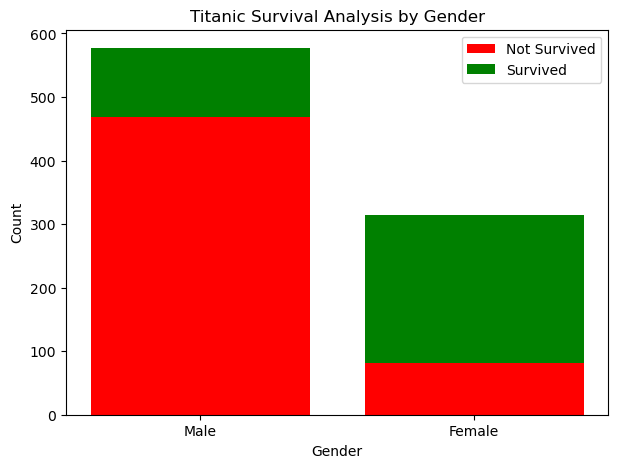

In [29]:
#define figure size
fig, ax = plt.subplots(figsize=(7, 5))

#Add stacked bar chart values from dataframe
ax.bar(df1['Gender'], df1['Not Survived'], label='Not Survived', color='red')
ax.bar(df1['Gender'], df1['Survived'], bottom=df1['Not Survived'], label='Survived', color='green')

# Add labels, title, and legend
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Titanic Survival Analysis by Gender')
ax.legend()

# Show plot
plt.show()

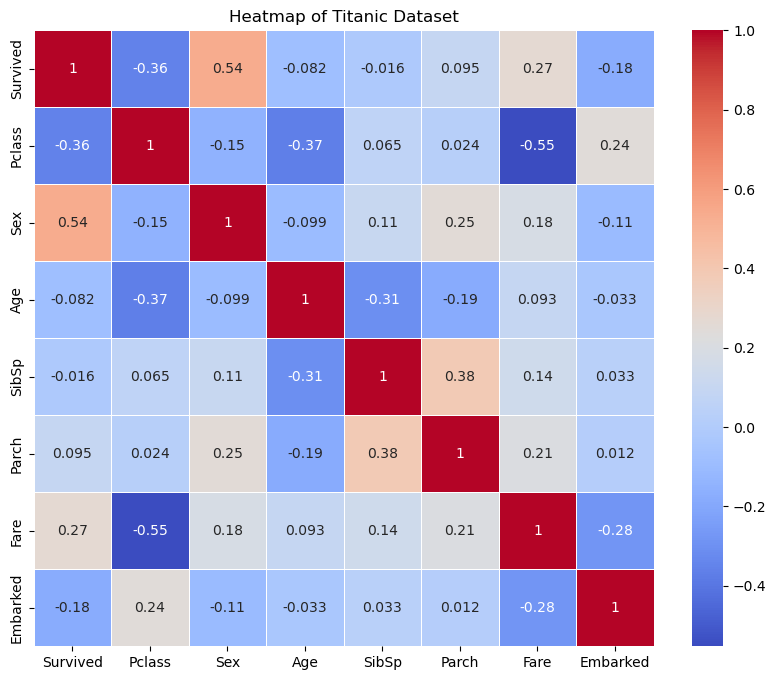

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Drop non-numeric and less useful columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Step 2: Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to numeric
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encode 'Embarked'

# Step 3: Handle missing data (drop or fill missing values)
df = df.dropna()  # Drop rows with missing values

# Step 4: Generate the correlation matrix
corr_matrix = df.corr()

# Step 5: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Titanic Dataset')
plt.show()